In [66]:
import os
import numpy as np
data_path=(r'D:\Machine Learning\DAY 01 - Tutorial\dataset')
#categories = os.listdir(r'D:\Machine Learning\DAY 01 - Tutorial\dataset')
categories = os.listdir(data_path)
print(categories)

labels=[i for i in range(len(categories))]
print(labels)
categories_dirc={'a':0,'ae':1,'e':2,'u':3}
print(categories_dirc)


['a', 'ae', 'e', 'u']
[0, 1, 2, 3]
{'a': 0, 'ae': 1, 'e': 2, 'u': 3}


In [78]:
import cv2

data=[]
target=[]

for category in categories:
    imgs_path=os.path.join(data_path,category)
    #print(imgs_path)
    img_names=os.listdir(imgs_path)
    #print(imgs_name)
    print(category,'-----------------------')
    
    for img_name in img_names:
        img_path=os.path.join(imgs_path,img_name)
        img=cv2.imread(img_path,0)
        img=cv2.resize(img,(8,8))
        data.append(img)
        target.append(categories_dirc[category])
        #print(img)
        # cv2.imshow('Live',img)
        # k=cv2.waitKey(100)
        # if(k==27):
        #     break


a -----------------------
ae -----------------------
e -----------------------
u -----------------------


In [79]:
print(len(data),len(target))

270 270


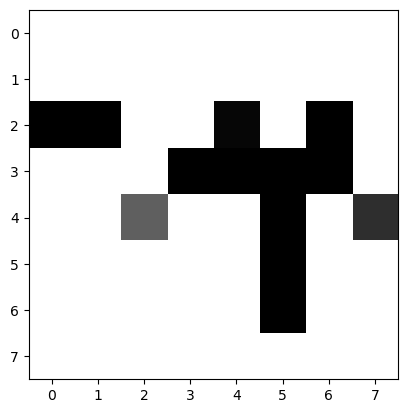

In [80]:
from matplotlib import pyplot as plt
plt.imshow(data[10],cmap='gray')

In [85]:
print('Data:',data[10])

Data: [[255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]
 [  0   0 255 255   6 255   0 255]
 [255 255 255   0   0   0   0 255]
 [255 255  95 255 255   0 255  46]
 [255 255 255 255 255   0 255 255]
 [255 255 255 255 255   0 255 255]
 [255 255 255 255 255 255 255 255]]


In [82]:
target[10]

0

In [88]:
data=np.array(data)
print('Before resize:',data.shape)

data=data.reshape(data.shape[0],data.shape[1]*data.shape[2])
print('After resize:',data.shape)
target=np.array(target)

np.save('Data',data)
np.save('Target',target)

Before resize: (270, 8, 8)
After resize: (270, 64)


In [ ]:
#Now weare train the model using collectin data

In [90]:
print(data.shape)
print(target.shape, target)

(270, 64)
(270,) [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3]


In [92]:
from sklearn.model_selection import train_test_split
tarin_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [96]:
print(tarin_data.shape,train_target.shape)
print(test_data.shape,test_target.shape)

(216, 64) (216,)
(54, 64) (54,)


In [98]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier() #load KNN algorithm into model
model.fit(tarin_data,train_target) #training the KNN model using traininig data and target

KNeighborsClassifier()

In [99]:
predicted_target=model.predict(test_data)
print(predicted_target)

[0 2 2 1 1 0 2 3 0 0 0 0 0 1 3 0 3 0 1 1 3 3 3 1 2 0 3 0 0 2 1 2 3 3 2 3 0
 1 0 0 1 0 0 1 0 2 1 0 3 1 0 2 2 3]


In [100]:
print('Test Target: ',test_target)

Test Target:  [0 0 0 1 2 0 2 3 0 0 0 1 0 1 3 0 0 0 1 1 3 3 3 1 2 0 3 2 0 2 1 2 3 3 2 3 0
 1 1 0 1 0 0 1 0 3 1 0 3 1 0 2 2 3]


In [102]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(test_target,predicted_target)
print('Accuracy :',accuracy)

Accuracy : 0.8518518518518519


In [103]:
from sklearn.metrics import classification_report

classi_report=classification_report(test_target,predicted_target)
print('Classification Report:',classi_report)

Classification Report:               precision    recall  f1-score   support

           0       0.85      0.85      0.85        20
           1       0.92      0.85      0.88        13
           2       0.70      0.78      0.74         9
           3       0.92      0.92      0.92        12

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54



In [104]:
import joblib

joblib.dump(model,'new-sinhala-character-knn.sav')

['new-sinhala-character-knn.sav']